# Финальный проект

### Материалы
Презентация: https://drive.google.com/file/d/1DshsuBI8FXXKz64KR7tvsi_5BekISzew/view?usp=sharing

Дашборд: https://public.tableau.com/app/profile/viktoriya.tarasova/viz/__1_16866153458500/Dashboard1


In [1]:
import pandas as pd
import math as mth
from scipy import stats as st
import random
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns; sns.set()
import plotly

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Предобработка данных

In [2]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
ecom = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )
ecom

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [3]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Пропусков в данных необнаружено

In [4]:
#Переведем значения столбца date в нужный формат
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')
ecom['dt'] = ecom['date'].astype('datetime64[D]')

ecom

,date,customer_id,order_id,product,quantity,price,dt
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01
...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,2020-01-30
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,2020-01-30
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,2020-01-31
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020-01-31


In [6]:
#выделим месяца, недели в отдельные столбцы

ecom['month'] = pd.to_datetime(ecom['dt']).dt.month

ecom['week'] = pd.to_datetime(ecom['dt']).dt.isocalendar().week


display(ecom.head())

,date,customer_id,order_id,product,quantity,price,dt,month,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,10,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,10,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,10,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,10,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,10,40


In [7]:
#переведем текст в столбце product к нижнему регистру для дальнейшего деления на сегметы и поис дубликатов

ecom['product'] = ecom['product'].str.lower()

display(ecom.head())

,date,customer_id,order_id,product,quantity,price,dt,month,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,10,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,10,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,10,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,10,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,10,40


In [9]:
#добавим столбец с полной ценой заказа

ecom['price_order'] = ecom['price'] * ecom['quantity']

Для проверки на дубликаты создадим сводную таблицу, так мы сможем понять есть ли действительно дубликаты или нет. Так как, как видно из данных, каждый товар из заказа записан отдельно б

In [10]:
ecom_piv = ecom.pivot_table(index=['dt', 'customer_id','order_id'], values='price_order', aggfunc='sum')

ecom_piv = ecom_piv.reset_index()

display(ecom_piv.head())

,dt,customer_id,order_id,price_order
0,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,3648.0
1,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,820.0
2,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,2374.0
3,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,824.0
4,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,187.0


In [11]:
ecom_piv.duplicated(['customer_id', 'order_id', 'dt']).sum()

0

Мы видим, что для каждого номера заказа для каждого покупателя нет дубликатов, то есть все заказы уникальны

# Исследовательский анализ данных

Сгруппируем данные по заказам, посмотрим на общую сумму и кол-во

In [35]:
grouped_by_orders = ecom.groupby(['customer_id', 'order_id']).agg({'price_order':'sum', 'price':'mean', 'product':'count', 'quantity':'sum', 'dt':'first'}).reset_index()
grouped_by_orders = grouped_by_orders.rename(columns={'price_order':'price_order', 'price':'avg_price', 'product':'products_in_order', 'quantity':'sum_products_in_order'})

display(grouped_by_orders.head())

,customer_id,order_id,price_order,avg_price,products_in_order,sum_products_in_order,dt
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,138.75,4,4,2019-10-16
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,442.00,1,1,2019-02-16
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0,457.00,1,2,2019-10-14
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1649.00,1,1,2019-01-27
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0,1162.00,1,2,2019-09-29


In [36]:
# сгруппируем датасет по пользователям
grouped_by_customers = grouped_by_orders.groupby('customer_id').agg({'order_id':'nunique', 
                                                                     'price_order':['sum', 'mean'], 
                                                                     'avg_price':'mean', 
                                                                     'products_in_order':'mean', 
                                                                     'sum_products_in_order':'mean'})
grouped_by_customers.columns = ['orders', 'total_revenue', 'avg_price_order', 'avg_price_of_product', 'avg_products_in_order', 'avg_sum_products_in_order']

display(grouped_by_customers.head())

,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,138.75,4.0,4.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,442.00,1.0,1.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,457.00,1.0,2.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1649.00,1.0,1.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1162.00,1.0,2.0


In [14]:
print('Всего покупателей: {}'.format(len(ecom['customer_id'].unique())))
print('Всего заказов: {}'.format(len(ecom['order_id'].unique())))
print('В среднем заказов на одного покупателя: {:.1f}'.format(round(grouped_by_customers['orders'].mean())))
print('Средняя выручка по покупателям составляет:',(grouped_by_customers['total_revenue'].median()))
print('Средняя сумма заказа составляет:',(grouped_by_customers['avg_price_order'].median()))
print('Средняя стоимость продукта по пользователям составляет:',(grouped_by_customers['avg_price_of_product'].median()))
print('Среднее кол-во позиций в заказе по пользователям: {:.1f}'.format(grouped_by_customers['avg_products_in_order'].median())) 
print('Среднее кол-во единиц товара в заказе по пользователям: {:.1f}'.format(grouped_by_customers['avg_sum_products_in_order'].median()))

Всего покупателей: 2451
Всего заказов: 3521
В среднем заказов на одного покупателя: 1.0
Средняя выручка по покупателям составляет: 907.0
Средняя сумма заказа составляет: 715.5
Средняя стоимость продукта по пользователям составляет: 340.5
Среднее кол-во позиций в заказе по пользователям: 1.0
Среднее кол-во единиц товара в заказе по пользователям: 1.0


В среднем покупатели совершают всего один заказ, магазину следует поработать над задержанием клиентов

Средняя выручка с 1 пользователя составляет 899

Средняя сумма заказа составляет 704.5

In [15]:
#ecom['product'].unique()

array(['комнатное растение в горшке алое вера, d12, h30',
       'комнатное растение в горшке кофе арабика, d12, h25',
       'радермахера d-12 см h-20 см', ...,
       'сушилка для белья на ванну freudenberg (gimi) alablock varadero silver a4p',
       'каланхое каландива малиновое d-7 см', 'литопс микс d-5 см'],
      dtype=object)

In [31]:
# посмотрим динамику по продажам по месяцам
grouped_by_date = ecom.groupby('month').agg({'customer_id':'nunique', 'price_order':'sum'}).reset_index()

In [32]:
grouped_by_date

,month,customer_id,price_order
0,1,426,4.587573e+05
1,2,249,3.454540e+05
2,3,239,3.200180e+05
3,4,241,3.819150e+05
4,5,175,3.067440e+05
5,6,159,1.086681e+06
6,7,187,2.765470e+05
7,8,168,1.978330e+05
8,9,176,2.060220e+05
9,10,357,6.723480e+05


In [33]:
fig = px.line(grouped_by_date, x='month', y='price_order', title='Динамика выручки по месяцам')
fig.update_layout(
    yaxis_title='Выручка',
    xaxis_title='Месяц')
fig.show()


fig = px.line(grouped_by_date, x='month', y='customer_id', title='Количество покупателей по месяцам')
fig.update_layout(
    yaxis_title='Количество покупателей',
    xaxis_title='Месяц')
fig.show()



Скачок в выручке пришелся на июнь, тем не менее в этом месяце кол-во покупателей было наименьшим, из чего следует, что в июне совершались заказы с бОльшей стоимостью.
В то же время рост покупателй происходил с сентября по декабрь, а в это время хоть и также происходил рост выручки, но ее размер был все равно ниже, чем в июне

Далее проверим, влияют ли на это выбросы

In [37]:
grouped_by_customers = grouped_by_customers.reset_index()

display(grouped_by_customers.head())

,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,138.75,4.0,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,442.00,1.0,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,457.00,1.0,2.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1649.00,1.0,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1162.00,1.0,2.0


In [22]:
grouped_by_customers = grouped_by_customers.sort_values(by='total_revenue', ascending=False)
display(grouped_by_customers.head(50))

,index,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
469,469,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,1,675000.0,675000.000000,675.000000,1.000000,1000.000000
1916,1916,c971fb21-d54c-4134-938f-16b62ee86d3b,126,166988.0,1325.301587,1018.108730,1.142857,2.730159
287,287,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,1,114750.0,114750.000000,127.500000,888.000000,900.000000
833,833,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,1,65220.0,65220.000000,1087.000000,60.000000,60.000000
742,742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,60828.0,1737.942857,771.192857,1.342857,11.685714
839,839,58a4c3cc-504f-43ea-a74a-bae19e665552,2,53232.0,26616.000000,1852.000000,1.000000,15.000000
1506,1506,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,1,50770.0,50770.000000,867.440000,50.000000,96.000000
199,199,146cd9bf-a95c-4afb-915b-5f6684b17444,1,49432.0,49432.000000,148.000000,1.000000,334.000000
699,699,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,41900.0,10475.000000,782.500000,1.000000,21.250000
1360,1360,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,1,33680.0,33680.000000,173.166667,6.000000,101.000000


In [38]:
grouped_by_customers = grouped_by_customers.sort_values(by='orders', ascending=False)
display(grouped_by_customers.head(20))

,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,126,166988.0,1325.301587,1018.108730,1.142857,2.730159
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,60828.0,1737.942857,771.192857,1.342857,11.685714
1101,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21713.0,1277.235294,1256.529412,1.058824,1.058824
1748,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3779.0,539.857143,98.000000,2.571429,9.714286
17,0184f535-b60a-4914-a982-231e3f615206,5,7707.0,1541.400000,172.006349,9.400000,15.000000
699,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,41900.0,10475.000000,782.500000,1.000000,21.250000
1820,bea7a833-2074-42db-bc49-4457abd3c930,4,4409.0,1102.250000,145.625000,3.500000,7.500000
2147,e0535076-6270-4df2-8621-cb06264a94fa,4,636.0,159.000000,159.000000,1.000000,1.000000
1980,d02429ab-22e0-4ff2-9465-3082befde444,3,3261.0,1087.000000,1087.000000,1.000000,1.000000
2209,e8204583-4d55-4724-ad3f-049c7db43bdd,3,3102.0,1034.000000,1034.000000,1.000000,1.000000


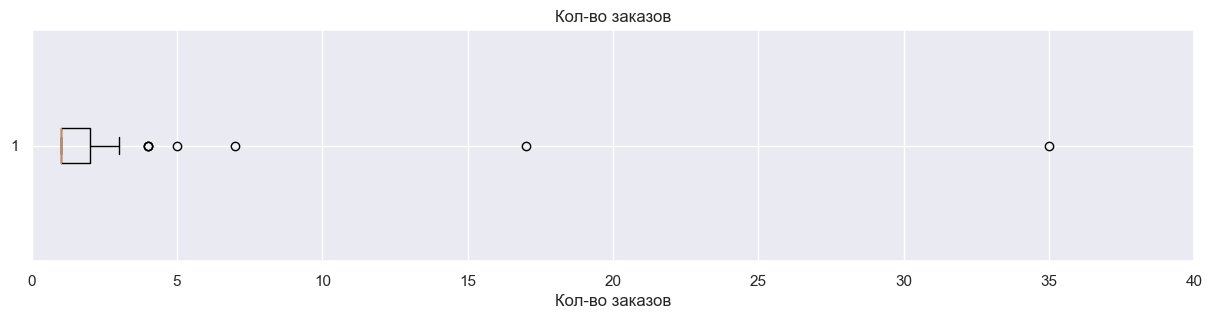

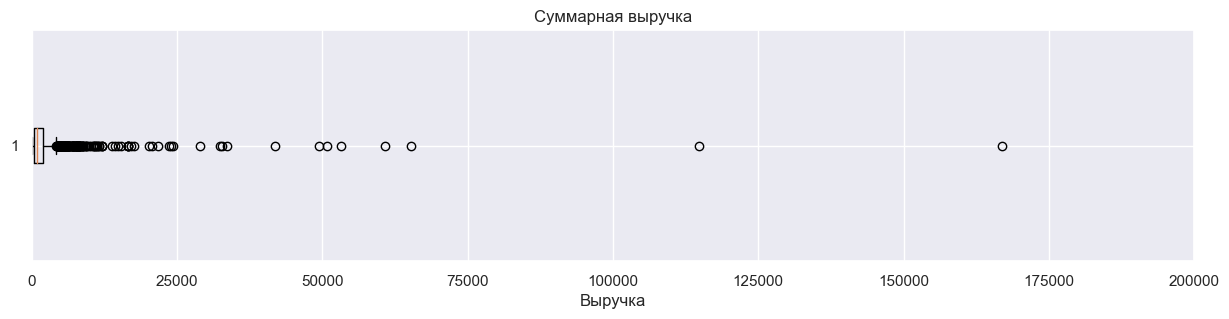

In [39]:
plt.figure(figsize=(15,3))
plt.title('Кол-во заказов')
plt.boxplot(grouped_by_customers['orders'], vert=False)
plt.xlabel('Кол-во заказов')
plt.xlim(0,40)
plt.show()
plt.figure(figsize=(15,3))
plt.title('Суммарная выручка')
plt.boxplot(grouped_by_customers['total_revenue'], vert=False)
plt.xlim(0,200000)
plt.xlabel('Выручка')
plt.show()

Посмотрев таблицы, отсортированные по общей выручке с покупателя и общему числу заказов каждого покупателя, а также боксплоты по выручке и заказам на покупателя, можно сделать вывод, что выбросами являются покупатели, которые сделали больше 5 заказов, а также покупатели, сумма выручки которых превышает 20 тысяч

In [40]:
#Избавимся от выбросов 

grouped_by_customers = grouped_by_customers.query('total_revenue < 20000.0')

grouped_by_customers.sort_values(by='total_revenue', ascending=False)

,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
1154,794e66f5-4d30-4860-b44c-903c9f58127f,1,17620.0,17620.0,1762.0,2.0,10.0
1954,cd09ea73-d9ce-48c3-b4c5-018113735e80,1,17100.0,17100.0,28.5,4.0,600.0
100,09bcc3d0-8134-4f00-8ea5-b74b55d766ad,1,16647.0,16647.0,5549.0,3.0,3.0
2319,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,2,16557.0,8278.5,4439.0,1.0,1.5
1367,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,1,16536.0,16536.0,5512.0,1.0,3.0
...,...,...,...,...,...,...,...
317,21df03ad-d9ac-47e9-a482-5372fd3e2464,1,22.0,22.0,22.0,1.0,1.0
167,10f79846-2640-4c43-8392-4e76ff5455ef,1,22.0,22.0,22.0,1.0,1.0
2225,e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,1,22.0,22.0,22.0,1.0,1.0
2086,da6f7bf7-f699-4046-a4dd-cab0c27debcb,1,22.0,22.0,22.0,1.0,1.0


In [41]:
grouped_by_customers = grouped_by_customers.query('orders < 5')

display(grouped_by_customers.head())

,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order
1820,bea7a833-2074-42db-bc49-4457abd3c930,4,4409.0,1102.250000,145.625000,3.5,7.500000
2147,e0535076-6270-4df2-8621-cb06264a94fa,4,636.0,159.000000,159.000000,1.0,1.000000
1980,d02429ab-22e0-4ff2-9465-3082befde444,3,3261.0,1087.000000,1087.000000,1.0,1.000000
2209,e8204583-4d55-4724-ad3f-049c7db43bdd,3,3102.0,1034.000000,1034.000000,1.0,1.000000
1006,6a86cc77-ef15-496f-b5d3-89005597ee5d,3,4028.0,1342.666667,156.208333,8.0,11.333333


In [42]:
print('Процент удаленных данных:', f"{(len(ecom['customer_id'].unique())-len(grouped_by_customers['customer_id']))/len(ecom['customer_id'].unique()):.2%}")

Процент удаленных данных: 0.86%


Получаем результат меньше одного процент, то ест удаление выбросов на исследование не повлияет

Далее построим графики без выбросов


In [43]:
fig = px.line(grouped_by_date, x='month', y='price_order', title='Динамика выручки по месяцам')
fig.update_layout(
    yaxis_title='Выручка',
    xaxis_title='Месяц')
fig.show()


fig = px.line(grouped_by_date, x='month', y='customer_id', title='Количество покупателей по месяцам')
fig.update_layout(
    yaxis_title='Количество покупателей',
    xaxis_title='Месяц')
fig.show()

In [44]:
customer_id = grouped_by_customers['customer_id']

In [45]:
ecom_1 = ecom.query('customer_id in @customer_id')

In [46]:
ecom_1 = ecom_1.groupby('month').agg({'customer_id':'nunique', 'price_order':'sum'})

ecom_1 = ecom_1.reset_index()


In [47]:
fig = px.line(ecom_1, x='month', y='price_order', title='Динамика выручки по месяцам')
fig.update_layout(
    yaxis_title='Выручка',
    xaxis_title='Месяц')
fig.show()


fig = px.line(ecom_1, x='month', y='customer_id', title='Количество покупателей по месяцам')
fig.update_layout(
    yaxis_title='Количество покупателей',
    xaxis_title='Месяц')
fig.show()

Если посмотреть на графики после удаления выбросов, то можно заметить, что рост выручки начинается с сентября и имеет более резкий характер, рост кол-ва покупателей также начинается в сентябре, но происходит медленнее

# Сегментация пользователей

## Категоризация товаров

Выделили 13 категорий товаров, больше всего товаров в категории "Рассада/семена", "Растения" и "Товары для дома".

In [48]:
#сформируем списки слов, по которым будем присваивать категории
plants = ['адиантум', 'азалия','аквилегия', 'алиссум', 'анемона', 'арбуз', 'аргирантерум', 'астра', 
          'афеляндра', 'бадан', 'базилик','бакопа', 'алоэ', 'амариллис', 'альбука', 'антуриум', 'аптения',
          'барвинок', 'бархатцы', 'бегония', 'бузульник', 'валериана', 'артемизия', 'аспарагус', 'афеляндра'
          'вербейник', 'колосковая', 'вигна', 'гайлардия', 'гардения', 'гвоздика', 'георгин', 'баклажан'
          'герань', 'гербера', 'гиацинт', 'гимнокалициум', 'гиностемма', 'гипсофил', 'глоксиния', 'годеция',
          'горох', 'гортензия', 'виноград', 'декабрист', 'дендробиум', 'джункус', 'диффенбахия', 'драцена', 'душица',
          'дыня', 'ель', 'замиокулькас', 'зверобой', 'земляника', 'змееголовник', 'иссоп', 'кабачок', 'каланхое',
          'калатея', 'календула', 'калибрахоа', 'калла', 'каллуна', 'калоцефалус', 'камнеломка', 'кампанула',
          'капсикум', 'капуста', 'кипарисовик', 'клен', 'клубника', 'кодонанта', 'колеус', 'колокольчик', 'растение',
          'кореопсис', 'кориандр', 'космея', 'котовник', 'кофе', 'крассула', 'крокусы', 'лаванда',
          'лаватера', 'лавр', 'лантана', 'лапчатка', 'лен', 'лилейник', 'литопс', 'лобелия', 'буддлея'
          'лук', 'львиный', 'любисток', 'маттиола', 'мединилла', 'мелисса', 'мимоза', 'мирт',
          'молодило', 'монарда', 'морковь', 'муррайя', 'мускари', 'мята', 'настурция', 'незабудка',
          'нефролепис', 'ромашка', 'нолина', 'овсянница', 'огурец', 'осина', 'папоротник', 'патиссон',
          'пахира', 'пеларгония', 'пеперомия', 'петрушка', 'петуния', 'пиретрум', 'платикодон', 'подарочный набор',
          'кашпо', 'подсолнечник', 'цветов', 'примула', 'пуансет', 'пряные травы', 'радермахера', 'ранункулус', 
          'роза', 'розмарин', 'рудбекия', 'сальвия', 'сантолина', 'седум', 'сельдерей', 'скиммия', 'синнингия',
          'смолевка', 'соланум', 'солидаго', 'спатифиллум', 'суккулент', 'сциндапсус', 'табак', 'тагетис',
          'тимьян', 'томат', 'тыкв', 'тюльпан', 'укроп', 'фаленопсис', 'фатсия', 'фиалка', 'физостегия',
          'фикус', 'фиттония', 'флокс', 'фуксия', 'хамедорея', 'хлорофитум', 'хоста', 'хризантема', 'хризолидокарпус',
          'цветущ', 'целозия', 'цикламен', 'цинера', 'циния', 'цинния', 'циперус', 'цитрофортунелла', 'чабер',
          'шалфей', 'эвкалипт', 'энотера', 'эпипремнум', 'эхеверия', 'эхинацея', 'эхинокактус', 'эшшольция',
          'юкка', 'ясколка']

seedling = ['рассада']

for_house = ['весы', 'ваза', 'перчат', 'почтов', 'прищеп', 'гладил','скатерт', 'завертка',
             'ковер', 'ковёр', 'коврик', 'весы', 'корыто', 'котел', 'халат', 'пылесо',
             'зажиг', 'рукав', 'ручка', 'глаж', 'обувниц', 
             'плед', 'подкладка', 'подрукавник', 'сушилк', 'термометр', 'ткань', 'утюг',
             'фен', 'фоторамка', 'одежд', 'костюм', 'шпингалет', 'веревка']

for_bedroom = ['постельн', 'простын', 'подуш', 'плед', 'матрас', 'мыло', 'покрывало', 'спальн',
               'наволоч', 'наматрас', 'одеял', 'наматрац', 'покрывало']

for_cleaning_and_washing = ['антижир', 'антинакипин', 'налет', 'извест', 'бальзам для', 'стир', 'губк', 
                            'мыло', 'соль', 'зубн', 'щетка', 'мыть', 'веник', 
                            'подрукавник', 'кондиционер', 'концентрат', 'швабр', 'средство',
                            'мойк', 'насадка-моп', 'валик', 'отбелив', 'отжим', 'чистк', 'чистящ', 'окон', 'ролик',
                            'совок', 'совком', 'засор', 'удален', 'тряпк', 'маска', 'щетка',
                            'щётка']

for_kitchen = ['блюд','венчик','вилк','вкладыш', 'разделочная','свч','соус', 'ложк', 
               'дуршлаг','измельч', 'картофелемялка','кастрюл','кипятильник', 'кисточка',
               'ковш','столов','круж', 'кувшин','кухон', 'ложк','лопатк', 'варка', 'масленк', 
               'стакан', 'миксер','сковород','миска', 'котел', 'бокал', 'нож','дозатор','посуд',
               'столов', 'фужер', 'кекс', 'салат', 'кухн', 'овощеварк', 'овощечист', 'пресс', 'блюд', 'орехоколка',
               'отделитель', 'яйц', 'половник', 'пресс', 'просеиват', 'противен', 'рассекатель', 
               'рыбочистка', 'салфет', 'сахар', 'скатерт', 'сито', 'скалка', 'кондитер', 'cоков', 'сотейник', 'тарелк',
               'терка', 'термо', 'толкушк', 'торт', 'выпечк', 'хлеб', 'чай', 'электроштопор', 'холодц']

storage = ['вакуумный пакет', 'вешал', 'плечик', 'ключница', 'стеллаж', 'хранен', 'крючок', 'комод', 
           'подставка', 'полка', 'кофр', 'лоток', 'полк', 'этажерка', 'ящик']

for_bathroom = ['ванн', 'вантуз', 'туалет', 'дозатор', 'ёрш', 'ерш', 'мыльница', 'подголовник', 
                'полотенц', 'унитаз', 'штанг', 'штора', 'карниз']

containers = ['бак', 'банка', 'бидон', 'бак ', 'мусор', 'ведр', 'контейнер', 'корзин', 'бидон', 'ковш',
              'короб', 'емкость', 'крышка', 'пикник', 'таз', 'урна', 'пакет']

instrument = ['крепеж', 'строит', 'инструм', 'сверл', 'стремянк', 'основание для пробки', 'петля', 
              'сварка', 'миксер', 'крепеж', 'пружин', 'петл', 'линейк', 'решетк', 'стяжк', 'уголок', 'фал',
              'фиксатор-шар', 'сварк', 'штангенциркуль']

bags = ['сумка', 'тележ']

replicas = ['муляж', 'искусственн']

#напишем функцию присваивания категории в зависимости присутсвия слов из списка в названии продукта
ecom['category'] = 0
def categoryzer(list_of_words, category):
  join = '|'.join(list_of_words)
  index = ecom[ecom['product'].str.lower().str.contains(join)].index.to_list()
  for i in index:
    ecom.loc[i, 'category'] = category
  return ecom

# присвоим категории товарам в нашем датафрейме
categoryzer(plants, 'Растения')
categoryzer(for_house, 'Товары для дома')
categoryzer(containers, 'Контейнеры')
categoryzer(storage, 'Хранение')
categoryzer(replicas, 'Муляжи')
categoryzer(for_bedroom, 'Спальня')
categoryzer(for_kitchen, 'Кухня')
categoryzer(for_cleaning_and_washing, 'Уборка/стирка')
categoryzer(for_bathroom, 'Ванна')
categoryzer(instrument, 'Инструменты')
categoryzer(bags, 'Сумки/тележки')
categoryzer(seedling, 'Рассада')
ecom['category'] = ecom['category'].apply(lambda x: 'Другое' if (x==0) else x)


categoryzer_ecom = ecom.groupby('category').agg({'product':'count'}).reset_index()
categoryzer_ecom.columns = ['category', 'rows']
categoryzer_ecom['percent'] = (categoryzer_ecom['rows'] / len(ecom)).round(3)
categoryzer_ecom['category'] = categoryzer_ecom['category'].replace(0, 'Без категории')
categoryzer_ecom = categoryzer_ecom.sort_values(by='percent', ascending = False)
categoryzer_ecom['percent'] = categoryzer_ecom['percent'].map('{:.1%}'.format)
print(categoryzer_ecom)
print('\nТоваров без категории: {}'.format(len(ecom[ecom['category']==0])))

           category  rows percent
7          Растения  2340   31.3%
6           Рассада  1665   22.3%
10  Товары для дома   800   10.7%
4             Кухня   551    7.4%
9     Сумки/тележки   497    6.6%
5            Муляжи   354    4.7%
3        Контейнеры   323    4.3%
0             Ванна   286    3.8%
11    Уборка/стирка   192    2.6%
12         Хранение   188    2.5%
2       Инструменты   148    2.0%
1            Другое    92    1.2%
8           Спальня    38    0.5%

Товаров без категории: 0


In [49]:
grouped_categories = ecom.query('customer_id in @customer_id').groupby('category').agg({'customer_id':'nunique', 'price':'mean', 'price_order':'sum'})
grouped_categories.columns = ['customers', 'avg_product_price', 'total_revenue']

In [50]:
grouped_categories['revenue_customer'] = grouped_categories['total_revenue'] / grouped_categories['customers']
grouped_categories = grouped_categories.sort_values(by='revenue_customer', ascending = False)
grouped_categories['total_revenue'] = round(grouped_categories['total_revenue'], 2)
grouped_categories['revenue_customer'] = round(grouped_categories['revenue_customer'], 2)
grouped_categories['avg_product_price'] = round(grouped_categories['avg_product_price'], 2)
grouped_categories['percent_of_revenue'] = round(grouped_categories['total_revenue'] / grouped_categories['total_revenue'].sum() *100 ,2)
grouped_categories['percent_of_customers'] = round(grouped_categories['customers'] / grouped_categories['customers'].sum() *100, 2)
display(grouped_categories)

,customers,avg_product_price,total_revenue,revenue_customer,percent_of_revenue,percent_of_customers
category,,,,,,
Сумки/тележки,328,1958.55,789720.25,2407.68,20.75,10.06
Инструменты,100,1371.06,212696.33,2126.96,5.59,3.07
Спальня,24,1646.96,44634.00,1859.75,1.17,0.74
Хранение,139,807.77,227105.00,1633.85,5.97,4.26
Товары для дома,570,1053.17,865882.67,1519.09,22.75,17.48
Ванна,212,784.83,244984.00,1155.58,6.44,6.50
Уборка/стирка,139,650.23,157465.50,1132.85,4.14,4.26
Контейнеры,170,544.20,181738.00,1069.05,4.78,5.21
Кухня,371,427.67,339981.50,916.39,8.93,11.38


In [51]:
fig = px.bar(grouped_categories.reset_index().sort_values(by='percent_of_revenue', ascending = False), 
             x='category', y='percent_of_revenue', width = 1300, height = 650, color='category', 
             text='percent_of_revenue')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Доля выручки по категориям товаров',
    xaxis_title="Категория",
    yaxis_title="Выручка")
fig.update_traces(textposition='outside')
fig.show()

Если рассматривать распределение покупок с точки зрения выручки, то на первом месте "Товары для дома" - 22.75%, на втором "Сумки/тележки" - 20.75%, а на третьем "Растения" - 13%. 

In [52]:
fig = px.bar(grouped_categories.reset_index().sort_values(by='percent_of_customers', ascending = False), 
             x='category', y='percent_of_customers', width = 1300, height = 650, color='category', 
             text='percent_of_customers')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Доля покупателей по категориям товаров',
    xaxis_title='Категория',
    yaxis_title='Кол-во покупателей')
fig.update_traces(textposition='outside')
fig.show()

Самая большая доля принадлежит покупателям товаров из категории "Растения" - 23.4%, на втором месте из категории "Товары для дома" - 17.5%, а на третьем из категории "Кухня" - 11.4%

Из проделанного анализа можно уже сделать вывод, что несмотря на то, что товары для дома покупают меньше, чем растения, категория товаров "Товары для дома" является одной из наиболее прибыльных, в то же время, хоть категория "Сумки/тележки" стоят на 4-м месте по доле покупателей, она приносит почти 21% от всей прибыли.  

## Сегементация пользователей

In [53]:
#сегментируем покупателей по категории товара
ecom['test'] = 1
classification = ecom.pivot_table(index = 'customer_id', columns = 'category', values='test', aggfunc='mean')
classification = classification.reset_index()
classification = classification.fillna(0)
classification = classification.query('customer_id in @customer_id')
classification

category,customer_id,Ванна,Другое,Инструменты,Контейнеры,Кухня,Муляжи,Рассада,Растения,Спальня,Сумки/тележки,Товары для дома,Уборка/стирка,Хранение
0,000d6849-084e-4d9f-ac03-37174eaf60c4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,001cee7f-0b29-4716-b202-0042213ab038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,ff601403-b094-4b86-9ac6-264d725b9277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2447,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2448,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2449,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X = classification.drop(['customer_id'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')

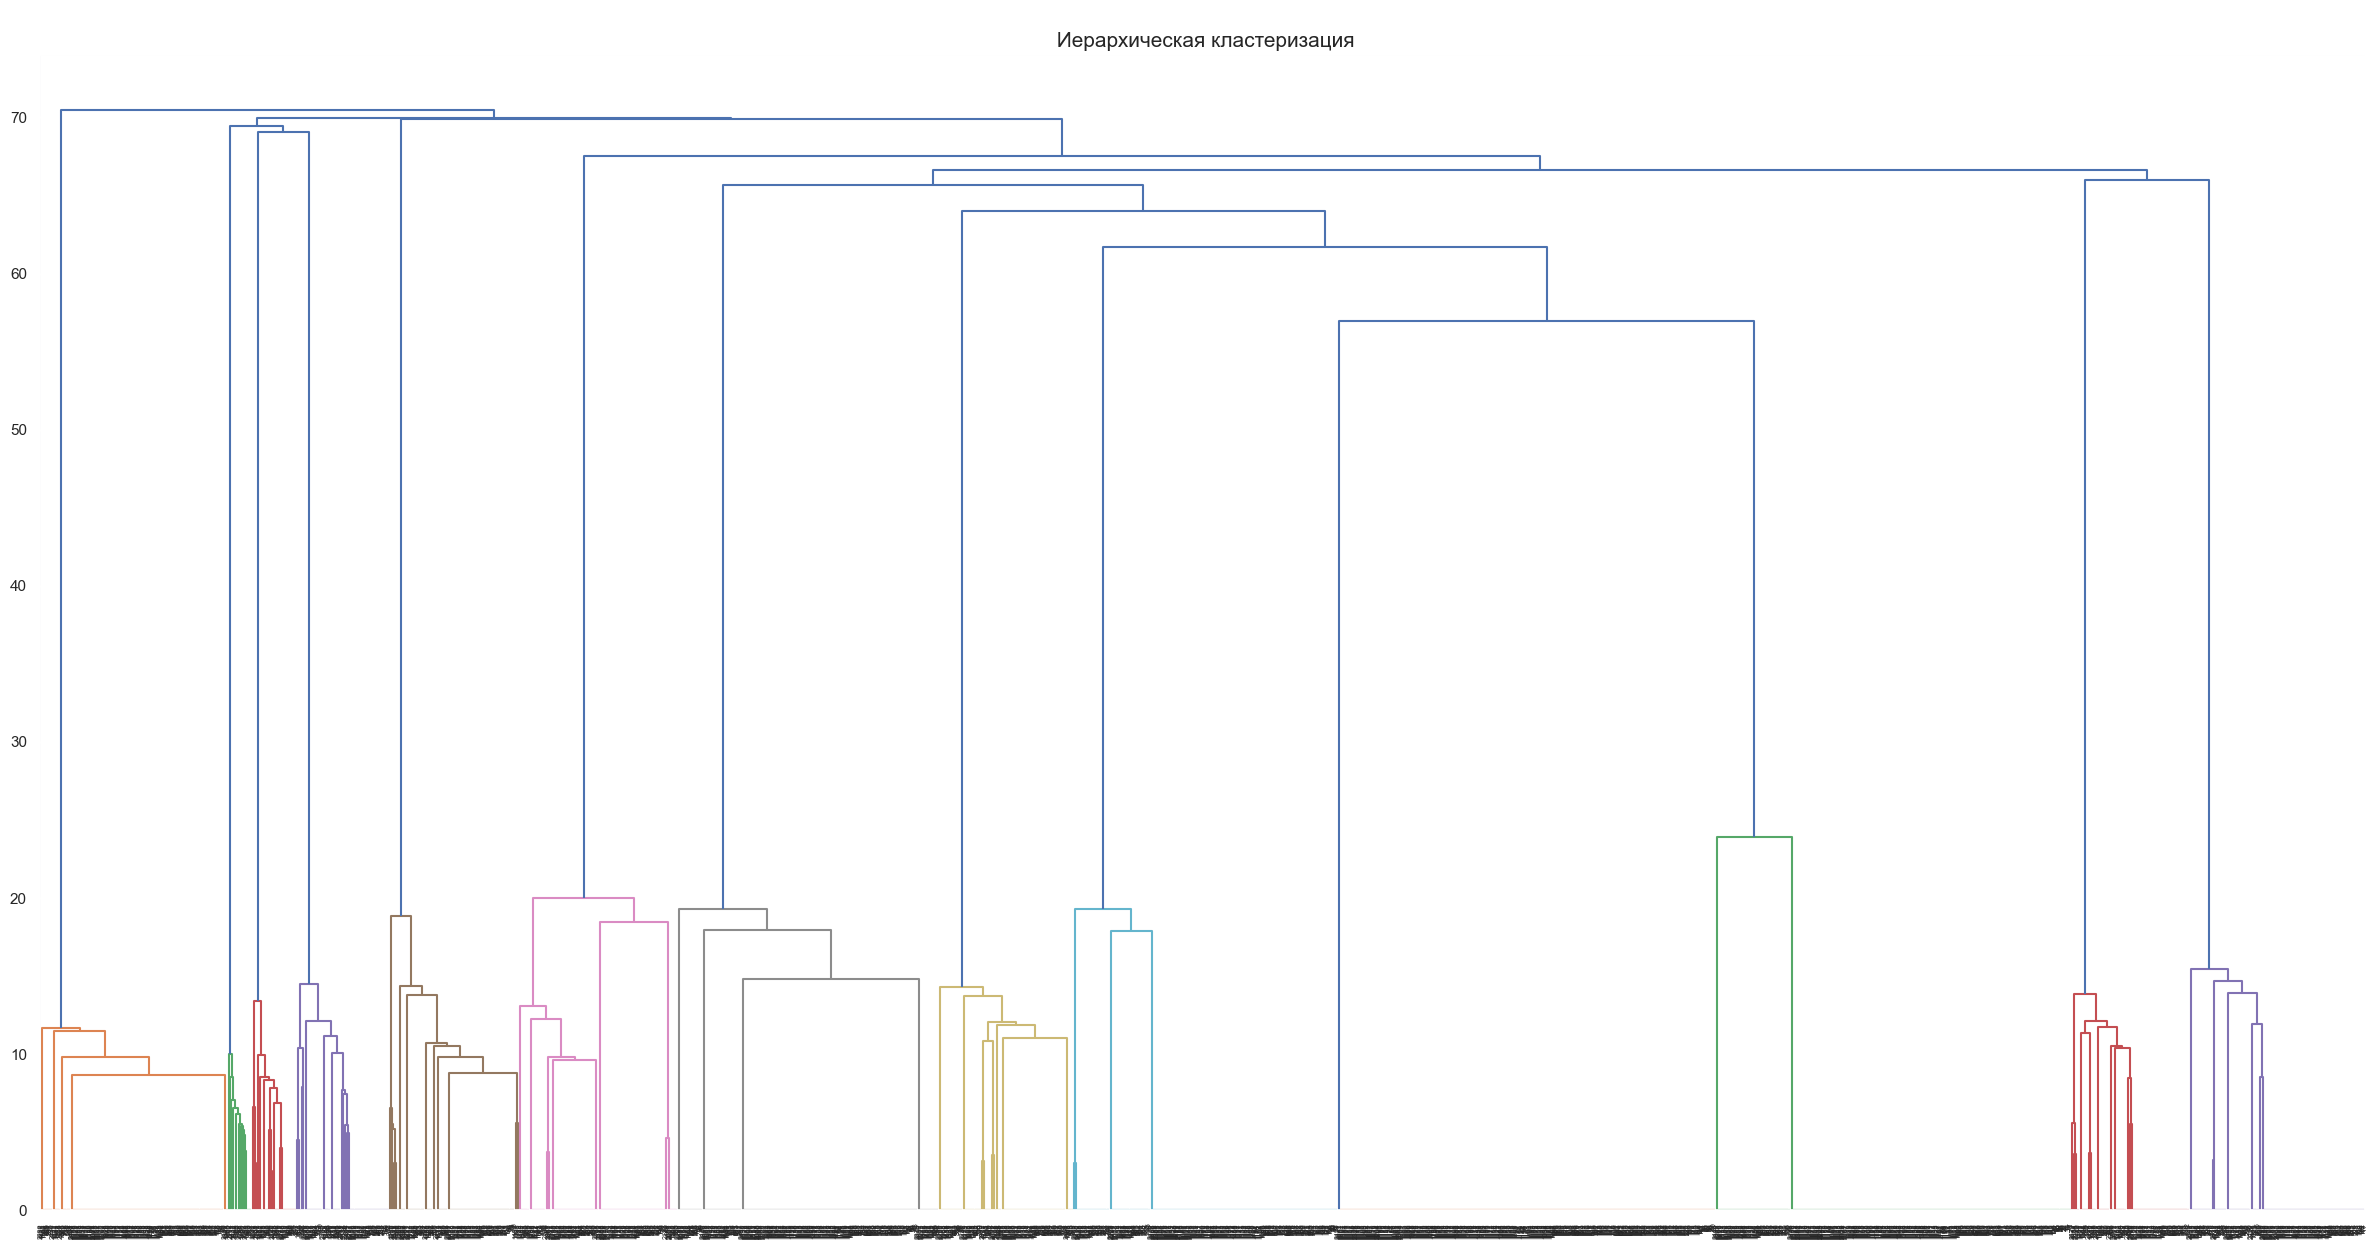

In [55]:
plt.figure(figsize=(30, 15))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 13, random_state = 0)
labels = km.fit_predict(X_st)
classification['cluster'] = labels


In [56]:
#classification.sort_values(by='cluster', ascending=False)

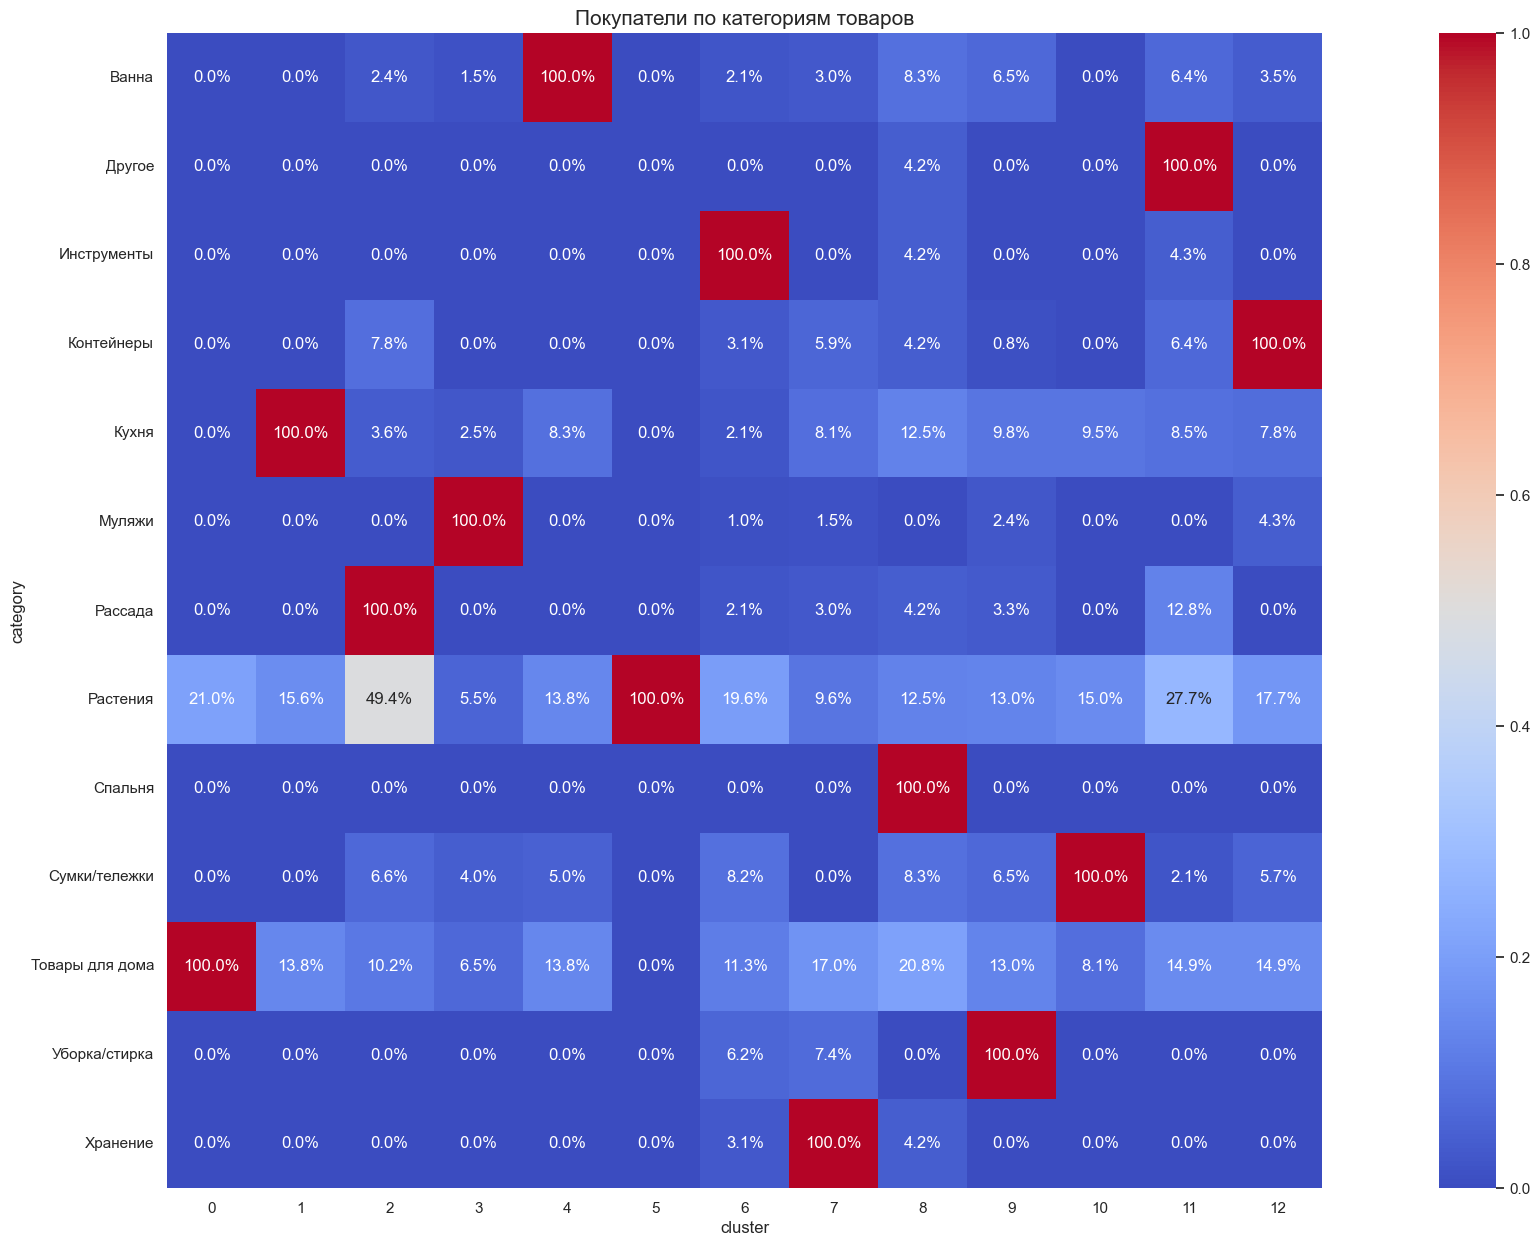

In [57]:
plt.figure(figsize=(30,15))
plt.title('Покупатели по категориям товаров', fontsize = 15)
sns.heatmap(classification.groupby('cluster').mean().T.loc[:'Хранение'], annot=True, cmap='coolwarm', square=True, fmt='.1%')
plt.show()
#присвоим каждому кластеру основную категорию товаров
cluster_category = pd.DataFrame()
categories_list = ['Растения','Товары для дома','Емкости','Уборка/стирка','Муляжи','Кухня',
                   'Инструменты','Ванна','Спальня','Контейнеры','Хранение','Сумки/тележки',
                   'Другое']
for i, category in zip(range(0,15), categories_list):
  cluster_category.loc[i, 'category'] = category
cluster_category = cluster_category.reset_index()
cluster_category.columns = ['cluster', 'category']

Посетители магазины, которые приобретали растения в 49% случаев также покупали рассаду, покупатели товаров для дома в 20.8% случаев приобретали также товары для спальни

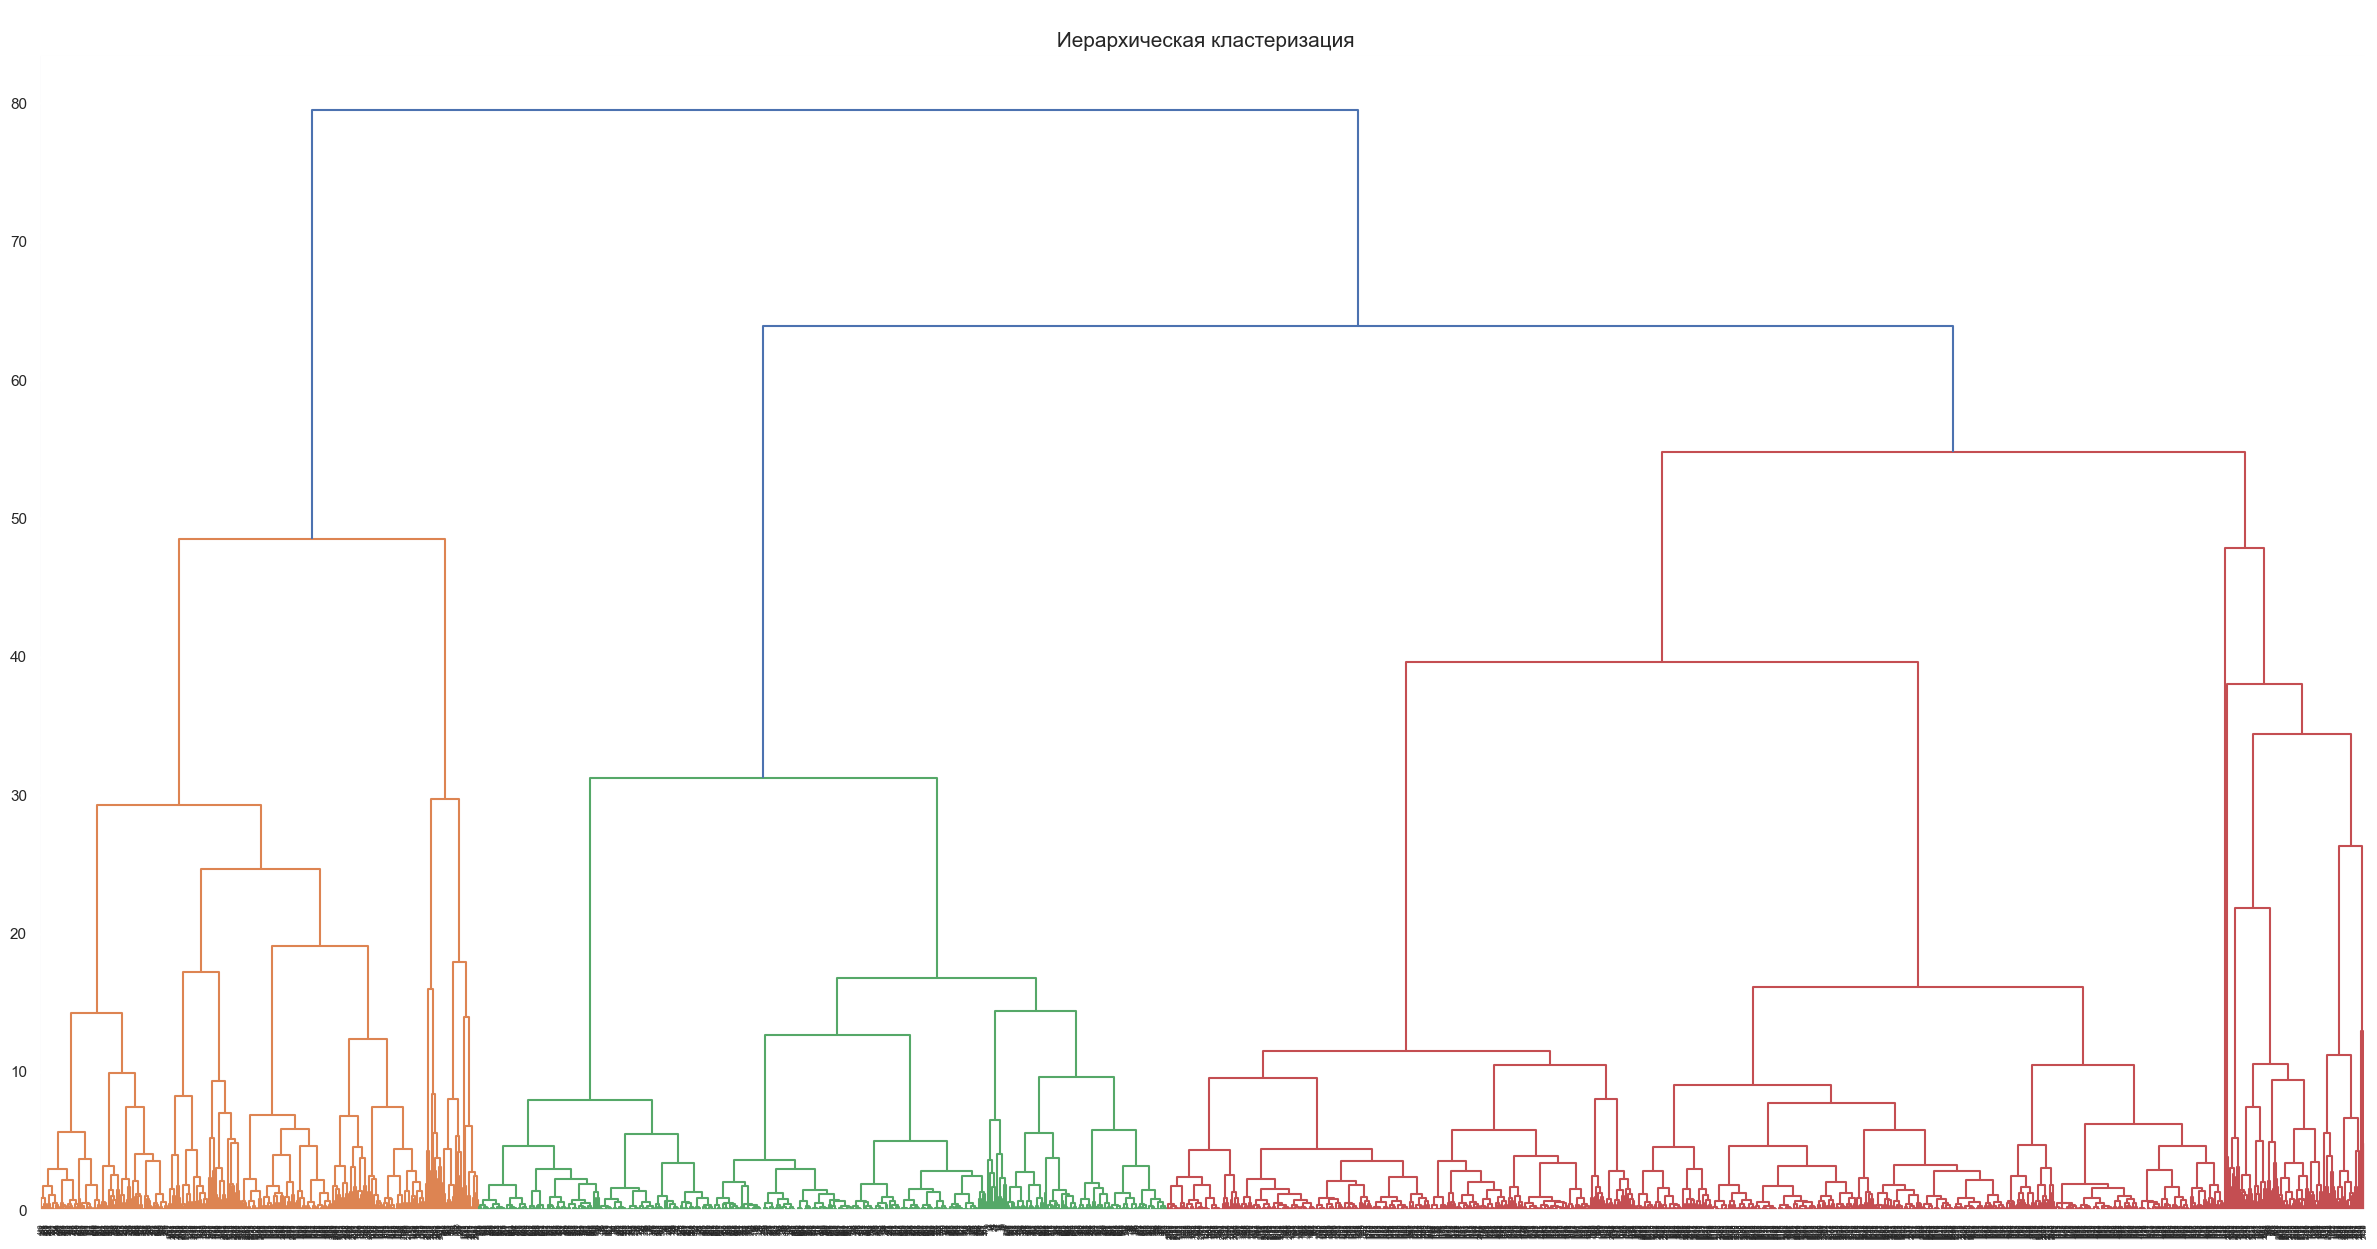

In [58]:
#сегментация покупателей по числовым критериям
grouped_by_customers = grouped_by_customers.reset_index().query('customer_id in @customer_id')
X = grouped_by_customers.drop(['customer_id'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(30, 15))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

In [59]:
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(X_st)
grouped_by_customers['cluster_by_numeric_criteria'] = labels

In [60]:
#объединим таблицы classification и grouped_by_customers
classification = classification.merge(grouped_by_customers.reset_index(), on='customer_id')

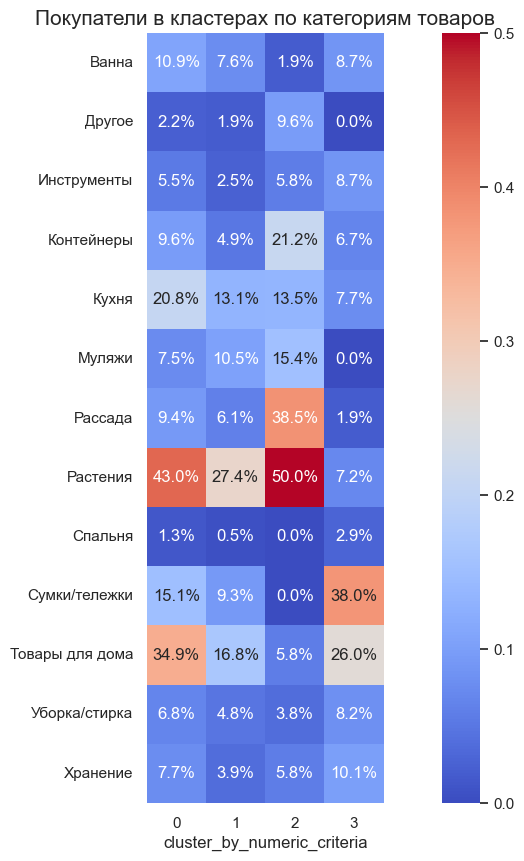

In [61]:
plt.figure(figsize=(15,10))
plt.title('Покупатели в кластерах по категориям товаров', fontsize = 15)
sns.heatmap(classification.groupby('cluster_by_numeric_criteria').mean().T.loc[:'Хранение'], annot=True, cmap='coolwarm', square=True, fmt='.1%')
plt.show()

In [62]:
#посмотрим зависимость покупок от сезона

ecom = ecom.merge(classification[['customer_id', 'cluster']], how='left', on='customer_id')

In [63]:
seasonality = ecom.groupby('order_id').agg({'category':'first', 'month':'first', 'customer_id':'first'})\
.query('customer_id in @customer_id').groupby(['month', 'category']).agg({'customer_id':'count'}).reset_index()
seasonality.columns = ['month', 'category', 'orders_by_customer']
seasonality

,month,category,orders_by_customer
0,1,Ванна,18
1,1,Другое,7
2,1,Инструменты,18
3,1,Контейнеры,22
4,1,Кухня,70
...,...,...,...
146,12,Спальня,7
147,12,Сумки/тележки,52
148,12,Товары для дома,95
149,12,Уборка/стирка,16


In [64]:
data = []
for category in ecom['category'].unique():
  season_category = seasonality[seasonality['category']==category]
  data += [go.Scatter(
          x = season_category['month'],
          y = season_category['orders_by_customer'],
          mode='lines',
          name = category
      )]
fig = go.Figure(data = data)
fig.update_layout(
    title='Сезонность по категориям',
    yaxis_title='Кол-во покупок',
    xaxis_title='Месяц')
fig.show()

"Растения" являюся особенно популярными в период с сентября по январь, с него спрос идет на спад. 
Спрос на "Товары для дома" растет с мая по декабрь, то же самое касатется товаров из категории "Сумки/тележки". 
"Товары для кухни" привлекают больше покупателей начиная с августа, по остальным категориям спрос достаточно стабильный в течениие всего года.

In [65]:
classification_comp = classification.drop(['index'], axis = 1).groupby('cluster').describe().T
classification_comp = classification_comp.reset_index()
classification_comp

cluster,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Ванна,count,372.0,276.0,166.000000,200.000000,181.0,395.0,97.000000,135.000000,24.000000,123.000000,273.0,47.000000,141.000000
1,Ванна,mean,0.0,0.0,0.024096,0.015000,1.0,0.0,0.020619,0.029630,0.083333,0.065041,0.0,0.063830,0.035461
2,Ванна,std,0.0,0.0,0.153812,0.121857,0.0,0.0,0.142842,0.170195,0.282330,0.247606,0.0,0.247092,0.185601
3,Ванна,min,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Ванна,25%,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,cluster_by_numeric_criteria,min,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
164,cluster_by_numeric_criteria,25%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
165,cluster_by_numeric_criteria,50%,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
166,cluster_by_numeric_criteria,75%,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.500000,1.000000,1.0,1.000000,1.000000


In [67]:
metrics = ['mean']
classification_comp = classification_comp.query('level_1 in @metrics').loc[121:].set_index('level_0').T
classification_comp = classification_comp.reset_index()
classification_comp = classification_comp.reset_index().merge(classification.groupby('cluster').agg({'customer_id':'count'}).reset_index(), on='cluster')
classification_comp = classification_comp.merge(cluster_category, on='cluster')
classification_comp = classification_comp.reset_index()


In [68]:
classification_comp = classification_comp.drop(['index', 'level_0'], axis=1)

display (classification_comp.head())

,cluster,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order,cluster_by_numeric_criteria,customer_id,category
0,0,1747.544803,1450.908154,950.028226,1.247312,2.852151,0.870968,372,Растения
1,1,1234.914855,989.546196,497.515738,1.480072,4.531401,0.724638,276,Товары для дома
2,2,1506.192771,1146.129016,320.459367,6.752008,8.921687,0.753012,166,Емкости
3,3,797.961667,674.473333,149.237675,1.605,12.176667,0.785,200,Уборка/стирка
4,4,1624.759669,1205.611878,789.921179,1.279006,2.403315,0.773481,181,Муляжи


In [69]:
classification_comp.columns = ['cluster', 'total_revenue', 'avg_price_order',\
                               'avg_price_of_product', 'avg_products_in_order', 'avg_sum_products_in_order',\
                               'cluster_by_numeric_criteria', 'customer_id', 'category']

In [70]:
classification_comp['total_revenue'] = round(classification_comp['total_revenue'].astype(int), 2)
classification_comp['avg_sum_products_in_order'] = round(classification_comp['avg_sum_products_in_order'].astype(int))
classification_comp['total_revenue'] = round(classification_comp['total_revenue'].astype(int), 2)

In [71]:
fig = px.bar(classification_comp.sort_values(by='total_revenue', ascending = False), 
             x='category', y='total_revenue', width = 1500, height = 700, color='category', 
             text='total_revenue')
fig.update_layout(
    title='Средняя выручка на покупателя по категории',
    xaxis_title='Категория',
    yaxis_title= 'Средняя выручка на покупателя')
fig.update_traces(textposition='outside')
 
fig.show()

In [72]:
fig = px.bar(classification_comp.sort_values(by='avg_sum_products_in_order', ascending = False), 
             x='category', y='avg_sum_products_in_order', width = 1500, height = 700, color='category', 
             text='avg_sum_products_in_order')
fig.update_layout(
    title='Среднее кол-во товаров в заказе по категории',
    xaxis_title='Категория',
    yaxis_title= 'Средняя кол-во товаров')
fig.update_traces(textposition='outside')
 
fig.show()

Наибольшая средняя выручка приходится на категории "Спальня" -  почти 3 тысячи, "Инструменты" 2,5 тысячи и "Хранение" - 2,5 тысячи

Наибольшее среднее число товаров в заказе в категориях "Уборка/стирка" - 12 шт , "Инструменты" - 11 шт, "Емкости" - 8 шт.

# Проверка гипотез

Первая гипотеза:
    H0 - средняя цена заказа по кластерам равна
    H1 - средняя цена заказа по кластерам различается 
    
Вторая гипотеза:
    H0 - выручка по кластерам (по категориям) одинаково
    H1 - выручка по кластерам (по категориям) различается

In [74]:
#Первая гипотеза, проверим есть ли разница между кластерами, 
#которые получились при делении по числовым критериям

cl_1 = grouped_by_customers.query('cluster_by_numeric_criteria == 0')

cl_2 = grouped_by_customers.query('cluster_by_numeric_criteria == 1')

cl_3 = grouped_by_customers.query('cluster_by_numeric_criteria == 2')

cl_4 = grouped_by_customers.query('cluster_by_numeric_criteria == 3')

cl_1
#results = st.ttest_ind(moscow_users, other_users, equal_var=False)#вызов метода для проверки гипотезы
#alpha = .05

,index,customer_id,orders,total_revenue,avg_price_order,avg_price_of_product,avg_products_in_order,avg_sum_products_in_order,cluster_by_numeric_criteria
0,1820,bea7a833-2074-42db-bc49-4457abd3c930,4,4409.0,1102.250000,145.625000,3.5,7.500000,0
1,2147,e0535076-6270-4df2-8621-cb06264a94fa,4,636.0,159.000000,159.000000,1.0,1.000000,0
2,1980,d02429ab-22e0-4ff2-9465-3082befde444,3,3261.0,1087.000000,1087.000000,1.0,1.000000,0
3,2209,e8204583-4d55-4724-ad3f-049c7db43bdd,3,3102.0,1034.000000,1034.000000,1.0,1.000000,0
4,1006,6a86cc77-ef15-496f-b5d3-89005597ee5d,3,4028.0,1342.666667,156.208333,8.0,11.333333,0
...,...,...,...,...,...,...,...,...,...
882,2217,e90a4c23-c337-4a5c-8a07-9fc55f1087a2,2,1537.0,768.500000,768.500000,1.0,1.000000,0
883,1584,a956f7e2-d024-4bce-be10-d7ccef0db118,2,426.0,213.000000,213.000000,1.0,1.000000,0
884,356,25c0bea0-5760-4269-8f37-4ee903d3f8e1,2,1266.0,633.000000,633.000000,1.0,1.000000,0
886,2220,e9d1a079-2c9b-455d-a25e-1338d7942e1a,2,247.0,123.500000,123.500000,1.0,1.000000,0


In [75]:
#попарное сравнение с cl_1

results = st.ttest_ind(cl_1['avg_price_order'], cl_2['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера со вторым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cl_1['avg_price_order'], cl_3['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с третьим:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')    

results = st.ttest_ind(cl_1['avg_price_order'], cl_4['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')    


Результат сравнения выручки первого кластера со вторым: 1.3794179435474616e-13
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с третьим: 6.314407631516371e-10
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с четвертым: 1.7163212473341808e-56
Отвергаем нулевую гипотезу


In [76]:
#попарное сравнение с cl_2

results = st.ttest_ind(cl_2['avg_price_order'], cl_3['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с третьим:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cl_2['avg_price_order'], cl_4['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')    

Результат сравнения выручки второго кластера с третьим: 3.3892641156410966e-09
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с четвертым: 2.195412935693589e-53
Отвергаем нулевую гипотезу


In [77]:
#попарное сравнение с cl_3

results = st.ttest_ind(cl_3['avg_price_order'], cl_4['avg_price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')


Результат сравнения выручки третьего кластера с четвертым: 0.08353235817112006
Не получилось отвергнуть нулевую гипотезу


In [79]:
#Вторая гипотеза, проверим есть ли разница между кластерами, которые получились при делении по категориям товаров

cluster_analysis = ecom.groupby(['customer_id', 'order_id']).agg({'price_order':'sum', 'price':'mean', 'product':'count', 'quantity':'sum', 'dt':'first', 'cluster':'first'}).reset_index()
cluster_analysis  = cluster_analysis.rename(columns={'price_order':'price_order', 'price':'avg_price', 'product':'products_in_order', 'quantity':'sum_products_in_order'})
display(cluster_analysis.head())

,customer_id,order_id,price_order,avg_price,products_in_order,sum_products_in_order,dt,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,138.75,4,4,2019-10-16,5.0
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,442.00,1,1,2019-02-16,0.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0,457.00,1,2,2019-10-14,9.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1649.00,1,1,2019-01-27,10.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0,1162.00,1,2,2019-09-29,7.0


In [80]:
cluster_1 = cluster_analysis.query('cluster == 0')

cluster_2 = cluster_analysis.query('cluster == 1')

cluster_3 = cluster_analysis.query('cluster == 2')

cluster_4 = cluster_analysis.query('cluster == 3')

cluster_5 = cluster_analysis.query('cluster == 4')

cluster_6 = cluster_analysis.query('cluster == 5')

cluster_7 = cluster_analysis.query('cluster == 6')

cluster_8 = cluster_analysis.query('cluster == 7')

cluster_9 = cluster_analysis.query('cluster == 8')

cluster_10 = cluster_analysis.query('cluster == 9')

cluster_11 = cluster_analysis.query('cluster == 10')

cluster_12 = cluster_analysis.query('cluster == 11')

cluster_13 = cluster_analysis.query('cluster == 12')

In [81]:
#попарное сравнение первого кластера

results = st.ttest_ind(cluster_1['price_order'], cluster_2['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера со вторым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_1['price_order'], cluster_3['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с третьим:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')    

results = st.ttest_ind(cluster_1['price_order'], cluster_4['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')  

    
results = st.ttest_ind(cluster_1['price_order'], cluster_5['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с пятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки первого кластера со вторым: 5.7642718626484655e-05
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с третьим: 0.032049322382368274
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с четвертым: 3.1266371565727065e-08
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с пятым: 0.20664541456205818
Не получилось отвергнуть нулевую гипотезу


In [82]:
results = st.ttest_ind(cluster_1['price_order'], cluster_6['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с шестым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_7['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с седьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_8['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_9['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки первого кластера с шестым: 2.330286177708342e-09
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с седьмым: 0.08460619779369016
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки первого кластера с восьмым: 0.6402751308818915
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки первого кластера с девятым: 0.1643125367149075
Не получилось отвергнуть нулевую гипотезу


In [83]:
results = st.ttest_ind(cluster_1['price_order'], cluster_10['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_11['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_12['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_1['price_order'], cluster_13['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки первого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки первого кластера с десятым: 0.29165237782557324
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки первого кластера с одиннадцатым: 6.933428577486907e-05
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с двенадцатым: 0.00038168917032113187
Отвергаем нулевую гипотезу
Результат сравнения выручки первого кластера с тринадцатым: 0.3020823142807253
Не получилось отвергнуть нулевую гипотезу


In [84]:
#попарное сравнение второго кластера

results = st.ttest_ind(cluster_2['price_order'], cluster_3['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с третьим:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_2['price_order'], cluster_4['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')    

results = st.ttest_ind(cluster_2['price_order'], cluster_5['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с пятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')  

    
results = st.ttest_ind(cluster_2['price_order'], cluster_6['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с шестым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки второго кластера с третьим: 0.14376201000513972
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки второго кластера с четвертым: 0.008856864764124102
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с пятым: 0.037497732956323415
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с шестым: 0.009206888155331501
Отвергаем нулевую гипотезу


In [85]:
results = st.ttest_ind(cluster_2['price_order'], cluster_7['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с седьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

results = st.ttest_ind(cluster_2['price_order'], cluster_8['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

results = st.ttest_ind(cluster_2['price_order'], cluster_9['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_2['price_order'], cluster_10['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки второго кластера с седьмым: 0.000319584088612842
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с восьмым: 0.00019366385973848066
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с девятым: 0.017471385932446043
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с десятым: 0.07414431132267815
Не получилось отвергнуть нулевую гипотезу


In [86]:
results = st.ttest_ind(cluster_2['price_order'], cluster_11['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_2['price_order'], cluster_12['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 
    
results = st.ttest_ind(cluster_2['price_order'], cluster_13['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки второго кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу') 

Результат сравнения выручки второго кластера с одиннадцатым: 4.544640360794928e-15
Отвергаем нулевую гипотезу
Результат сравнения выручки второго кластера с двенадцатым: 0.2733380259379227
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки второго кластера с тринадцатым: 0.09215245657222489
Не получилось отвергнуть нулевую гипотезу


In [87]:
#попарное сравнение третьего кластера

results = st.ttest_ind(cluster_3['price_order'], cluster_4['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с четвертым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_5['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с пятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_6['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с шестым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_7['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с седьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки третьего кластера с четвертым: 0.0005957205972215487
Отвергаем нулевую гипотезу
Результат сравнения выручки третьего кластера с пятым: 0.49107040887223363
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки третьего кластера с шестым: 0.0005326845615534801
Отвергаем нулевую гипотезу
Результат сравнения выручки третьего кластера с седьмым: 0.004683530955954483
Отвергаем нулевую гипотезу


In [88]:
results = st.ttest_ind(cluster_3['price_order'], cluster_8['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_9['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_10['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_3['price_order'], cluster_11['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки третьего кластера с восьмым: 0.022671633219254857
Отвергаем нулевую гипотезу
Результат сравнения выручки третьего кластера с девятым: 0.04502341661811765
Отвергаем нулевую гипотезу
Результат сравнения выручки третьего кластера с десятым: 0.5232974839855105
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки третьего кластера с одиннадцатым: 6.108575812832059e-09
Отвергаем нулевую гипотезу


In [89]:
results = st.ttest_ind(cluster_3['price_order'], cluster_12['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_3['price_order'], cluster_13['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки третьего кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки третьего кластера с двенадцатым: 0.05115296595578837
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки третьего кластера с тринадцатым: 0.5515528331068409
Не получилось отвергнуть нулевую гипотезу


In [90]:
#попарное сравнение четвертого кластера

results = st.ttest_ind(cluster_4['price_order'], cluster_5['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с пятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_4['price_order'], cluster_6['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с шестым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
          
        
results = st.ttest_ind(cluster_4['price_order'], cluster_7['price_order'], equal_var=False) 
alpha = .05

print('Результат сравнения выручки четвертого кластера с седьмым:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_4['price_order'], cluster_8['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с восьмым:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки четвертого кластера с пятым: 0.00013425515839653402
Отвергаем нулевую гипотезу
Результат сравнения выручки четвертого кластера с шестым: 0.5742578160215515
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки четвертого кластера с седьмым: 4.481806068091576e-06
Отвергаем нулевую гипотезу
Результат сравнения выручки четвертого кластера с восьмым: 2.571585674753242e-07
Отвергаем нулевую гипотезу


In [91]:
results = st.ttest_ind(cluster_4['price_order'], cluster_9['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_4['price_order'], cluster_10['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
          
results = st.ttest_ind(cluster_4['price_order'], cluster_11['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_4['price_order'], cluster_12['price_order'], equal_var=False)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_4['price_order'], cluster_13['price_order'], equal_var=True)#вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки четвертого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки четвертого кластера с девятым: 0.0030612838081093613
Отвергаем нулевую гипотезу
Результат сравнения выручки четвертого кластера с десятым: 0.0007560292180507664
Отвергаем нулевую гипотезу
Результат сравнения выручки четвертого кластера с одиннадцатым: 3.4294294092395517e-18
Отвергаем нулевую гипотезу
Результат сравнения выручки четвертого кластера с двенадцатым: 0.441143814387315
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки четвертого кластера с тринадцатым: 0.0008857075209827139
Отвергаем нулевую гипотезу


In [92]:
#попарное сравнение пятого кластера

results = st.ttest_ind(cluster_5['price_order'], cluster_6['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с шестым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

    
results = st.ttest_ind(cluster_5['price_order'], cluster_7['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с седьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_5['price_order'], cluster_8['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_5['price_order'], cluster_9['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки пятого кластера с шестым: 0.00012000801845139866
Отвергаем нулевую гипотезу
Результат сравнения выручки пятого кластера с седьмым: 0.017604315723266574
Отвергаем нулевую гипотезу
Результат сравнения выручки пятого кластера с восьмым: 0.12609071732710095
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки пятого кластера с девятым: 0.07597794165284848
Не получилось отвергнуть нулевую гипотезу


In [93]:
results = st.ttest_ind(cluster_5['price_order'], cluster_10['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_5['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_5['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_5['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки пятого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
    

Результат сравнения выручки пятого кластера с десятым: 0.9700387580086058
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки пятого кластера с одиннадцатым: 1.7397350206263322e-06
Отвергаем нулевую гипотезу
Результат сравнения выручки пятого кластера с двенадцатым: 0.016841362298821022
Отвергаем нулевую гипотезу
Результат сравнения выручки пятого кластера с тринадцатым: 0.984948350438626
Не получилось отвергнуть нулевую гипотезу


In [94]:
#попарное сравнение шестого кластера

results = st.ttest_ind(cluster_6['price_order'], cluster_7['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с седьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_6['price_order'], cluster_8['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_6['price_order'], cluster_9['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_6['price_order'], cluster_10['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки шестого кластера с седьмым: 6.766820271981425e-06
Отвергаем нулевую гипотезу
Результат сравнения выручки шестого кластера с восьмым: 1.2332590593821178e-07
Отвергаем нулевую гипотезу
Результат сравнения выручки шестого кластера с девятым: 0.004270399612624834
Отвергаем нулевую гипотезу
Результат сравнения выручки шестого кластера с десятым: 0.001043255181609063
Отвергаем нулевую гипотезу


In [95]:
results = st.ttest_ind(cluster_6['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_6['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_6['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки шестого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки шестого кластера с одиннадцатым: 6.101132565344672e-21
Отвергаем нулевую гипотезу
Результат сравнения выручки шестого кластера с двенадцатым: 0.6719753390792441
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки шестого кластера с тринадцатым: 0.0018292797414519737
Отвергаем нулевую гипотезу


In [96]:
#попарное сравнение седьмого кластера

results = st.ttest_ind(cluster_7['price_order'], cluster_8['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с восьмым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_7['price_order'], cluster_9['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_7['price_order'], cluster_10['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_7['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_7['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_7['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки седьмого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки седьмого кластера с восьмым: 0.17138289777320423
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки седьмого кластера с девятым: 0.7075977087951262
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки седьмого кластера с десятым: 0.025239406066682853
Отвергаем нулевую гипотезу
Результат сравнения выручки седьмого кластера с одиннадцатым: 0.568478510076922
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки седьмого кластера с двенадцатым: 0.00014581922216155865
Отвергаем нулевую гипотезу
Результат сравнения выручки седьмого кластера с тринадцатым: 0.026709236611572713
Отвергаем нулевую гипотезу


In [97]:
#попарное сравнение восьмого кластера

results = st.ttest_ind(cluster_8['price_order'], cluster_9['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки восьмого кластера с девятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_8['price_order'], cluster_10['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки восьмого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_8['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки восьмого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_8['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки восьмого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_8['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки восьмого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки восьмого кластера с девятым: 0.22589765329462774
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки восьмого кластера с десятым: 0.18269048094383986
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки восьмого кластера с одиннадцатым: 0.0024392484929768128
Отвергаем нулевую гипотезу
Результат сравнения выручки восьмого кластера с двенадцатым: 0.0003268846300372166
Отвергаем нулевую гипотезу
Результат сравнения выручки восьмого кластера с тринадцатым: 0.19118090510870575
Не получилось отвергнуть нулевую гипотезу


In [98]:
#попарное сравнение девятого кластера

results = st.ttest_ind(cluster_9['price_order'], cluster_10['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки девятого кластера с десятым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_9['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки девятого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_9['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки девятого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_9['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки девятого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки девятого кластера с десятым: 0.08307969912425485
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки девятого кластера с одиннадцатым: 0.9365344076345852
Не получилось отвергнуть нулевую гипотезу
Результат сравнения выручки девятого кластера с двенадцатым: 0.008249445143033423
Отвергаем нулевую гипотезу
Результат сравнения выручки девятого кластера с тринадцатым: 0.08343683211063786
Не получилось отвергнуть нулевую гипотезу


In [99]:
#попарное сравнение десятого кластера

results = st.ttest_ind(cluster_10['price_order'], cluster_11['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки десятого кластера с одиннадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

results = st.ttest_ind(cluster_10['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки девятого кластера с двенадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_10['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки десятого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    

Результат сравнения выручки десятого кластера с одиннадцатым: 2.82417301290213e-05
Отвергаем нулевую гипотезу
Результат сравнения выручки девятого кластера с двенадцатым: 0.026905871799607347
Отвергаем нулевую гипотезу
Результат сравнения выручки десятого кластера с тринадцатым: 0.9873391824004036
Не получилось отвергнуть нулевую гипотезу


In [100]:
#попарное сравнение одиннадцатого кластера

results = st.ttest_ind(cluster_11['price_order'], cluster_12['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки одиннадцатого кластера с двенадцатого:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    
results = st.ttest_ind(cluster_11['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки одиннадцатого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')
    

Результат сравнения выручки одиннадцатого кластера с двенадцатого: 5.690003099257518e-10
Отвергаем нулевую гипотезу
Результат сравнения выручки одиннадцатого кластера с тринадцатым: 4.7968760961149e-05
Отвергаем нулевую гипотезу


In [101]:
#попарное сравнение двенадцатого кластера

results = st.ttest_ind(cluster_12['price_order'], cluster_13['price_order'], equal_var=False) #вызов метода для проверки гипотезы
alpha = .05

print('Результат сравнения выручки двенадцатого кластера с тринадцатым:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

Результат сравнения выручки двенадцатого кластера с тринадцатым: 0.032504259010015205
Отвергаем нулевую гипотезу


# Вывод

Нами были проанализированы данные по покупкам в магазине «Пока все ещё тут». 
Сначала мы изучили данные, очистили их от выбросов, посмотрели на динамику выручки и покупателей по месяцам до очистки от выбросов и после. Рост выручки начинается с сентября и имеет более резкий характер, чем рост кол-ва покупателей, чей рост также начинается в сентябре. 

Было выявлено, что всего было 2451 покупателей, которые в сумме совершили 3521 заказ. В среднем каждый покупатель совершал заказ всего один раз, то есть покупатели крайне редко возвращаются в магазин, стооит разработать стратегию касательно того, как привлекать покупателей повторно.

Далее мы разделили покупки посетителей магазина на 13 категорий. 
Чаще всего покупки из разных категорий совершали покупатели растений, в 49% процентов случаев это была рассада, в 27.7% - другие товары, к данной категории были отнесены те товары, которые было невозможно точно отнести к одной из 13 выбранных.
С точки зрения выручки, на первом месте располагаются "Товары для дома" - 22.75%, на втором "Сумки/тележки" - 20.75%, а на третьем "Растения" - 13%. Самая большая доля в разделении по кол-ву покупателей принадлежит товарам из категории "Растения" - 23.8%, на втором месте из категории "Товары для дома" - 17.5%, а на третьем из категории "Кухня" - 11.4%. 
Несмотря на то, что товары для дома покупают меньше, чем растения, категория товаров "Товары для дома" является одной из наиболее прибыльных, в то же время, хоть категория "Сумки/тележки" стоят на 4-м месте по доле покупателей, она приносит почти 21% от всей прибыли.

На основании выделенных категорий, стоит создавать персональные предложения по наиболее популярным категориям, но также и по наиболее прибыльным, так как несмотря на то, что "Растения" самая ходовая категория, "Сумки/тележки" приносят больше прибыли, а наибольшая средняя выручка вообще приходится на категории "Спальня" - почти 3 тысячи, "Инструменты" и "Хранение" по 2.5 тысячи. Крупнейшими по среднему кол-во товаров в заказе являются  категории "Уборка/стирка" - 12 шт, "Инструменты" - 11 шт, "Емкости" - 8 шт, так что можно выделить топ категорий основываясь на этих факторах и рассылать покупателям из этих категорий персональные предложения.

Что касается сезонности покупок, "Растения" являюся особенно популярными в период с сентября по январь, с него спрос идет на спад, спрос на "Товары для дома" растет с мая по декабрь, то же самое касатется товаров из категории "Сумки/тележки", "Товары для кухни" привлекают больше покупателей начиная с августа

Мы также проверили две гипотезы: 
1. Средняя цена заказа по кластерам (по числовым признакам) равна
2. Выручка по кластерам (по категориям) одинакова

По итогу мы получили, что:
- первая гипотеза принимается только для третьего и четвертого кластеров, при их сравнении p-value было меньше 0.05, при остальных сравнениях было выявлено, что средняя цена заказа различается

- при сравнении кластеров (по категориям) получили, что выручка одинакова для 1 и 5, 1 и 7, 1 и 8, 1и 9, 1 и 10, 1 и 13 кластеров, для 2 и 3, 2 и 10, 2 и 12, 2 и 13 кластеров, для 3 и 5, 3 и 10, 3 и 12, 3 и 13 кластеров, для 4 и 6, 4 и 12 кластеров, для 5 и 8, 5 и 9, 5 и 10, 5 и 13 кластеров, для 6 и 12 кластеров, для 7 и 8, 7 и 9, 7 и 11 кластеров, для 8 и 9, 8 и 10, 8 и 13 кластеров, для 9 и 10, 9 и 11, 9 и 13 кластеров и для 10 и 13 кластеров.
 
